## Pulling in Raw data into Dataframes

In [59]:
# Create import files
import pandas as pd
from pathlib import Path

# Import libraries for graphs
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
%matplotlib inline
from panel.interact import interact
from bokeh.models import ColumnDataSource, Slider, HoverTool, NumeralTickFormatter #Installation of bokeh is required
from bokeh.plotting import figure, output_file, show
import plotly.graph_objects as go
import altair as alt  #Installation of Altair is required

import numpy as np
import panel as pn
import plotly.express as px
pn.extension("plotly")

In [2]:
# Set the CSV to use as Path Class
closing_prices_path = Path("Raw_Data/Closing_prices.csv")
ESG_path = Path("Raw_Data/barrons_ESG.csv")
financial_path = Path("Raw_Data/Financial_Analysis.csv")
barron_path = Path("Raw_Data/barrons_Morningstars.csv")

In [3]:
# Import CSV into Dataframe

closing_prices = pd.read_csv(closing_prices_path, index_col="Dates", parse_dates=True, infer_datetime_format=True)
ESG_data = pd.read_csv(ESG_path, index_col="Ticker", parse_dates=True, infer_datetime_format=True)
barron_data= pd.read_csv(barron_path, index_col="Ticker", parse_dates=True, infer_datetime_format=True)
financial_data = pd.read_csv(financial_path, parse_dates=True, infer_datetime_format=True)

#Modify column name in financial_data to match name with other Indexes
financial_data = financial_data.rename(columns={"Tickers": "Ticker"})
financial_clean = financial_data.set_index('Ticker').dropna()

In [4]:
# Rename SPX Index to match closing prices data
ESG_data.rename(index = {"SPY": "SPX_index"}, inplace = True) 
financial_clean.rename(index = {"SPY": "SPX_index"}, inplace = True)
barron_data.rename(index = {"SPY": "SPX_index"}, inplace = True)

## Data cleaning

In [5]:
# Drop Null Values
closing_fixed = closing_prices.dropna(axis = 'columns')
ESG_fixed = ESG_data.dropna()

In [6]:
# Rename the columns
closing_fixed.columns = closing_fixed.columns.str.replace(r'us equity', '')
barron_data.columns = ['Name','10 year return', 'Dividend Yield TTM', 'Morningstar Risk', 'Turnover Ratio', 'SEC Dividend Yield', 'Morningstar Rating','Fund Category', 'Standard Deviation 3 year']
barron_data = barron_data.dropna(subset=['10 year return'])

In [7]:
# Delete unnessary columns and rows
del financial_clean['Weight (%)']
del barron_data['SEC Dividend Yield']
del barron_data['Standard Deviation 3 year']
barron_clean = barron_data.drop(['barrons_tickers'])

## Correctly Formatted Dataframes for Team


In [8]:
closing_fixed.head(3)

,MXXVX,VLCGX,MIGFX,UMLGX,MGK,VIGRX,CSIEX,WLGAX,POGAX,BIAFX,...,SSHFX,HRCVX,FBCVX,NNGRX,TORYX,FDSAX,YAFFX,YACKX,SPX_index,GSIN index
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,11.83,10.04,13.43,10.14,41.8700,27.32,30.53,11.40,14.02,7.84,...,28.58,12.06,9.96,17.13,26.76,9.98,16.13,15.22,1115.10,72.81
2010-01-04,12.01,10.22,13.59,10.23,42.4699,27.76,30.97,11.58,14.26,7.93,...,29.10,12.22,10.20,17.45,27.08,10.12,16.33,15.41,1132.98,74.05
2010-01-05,12.07,10.24,13.57,10.27,42.5700,27.84,31.09,11.61,14.30,7.97,...,29.20,12.23,10.29,17.52,27.07,10.14,16.33,15.41,1136.52,74.24


In [9]:
financial_clean.head(3)

,Name,P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,
AMFEX,AAMA Equity,16.21,2.81,9.91,28.25,9.79,0.87,"114,361.73"
AUIAX,AB Equity Income A,13.37,1.97,8.47,28.10,8.01,2.91,"95,224.17"
FDSAX,AIG Focused Dividend,10.79,2.23,5.90,23.64,7.17,3.95,"50,471.18"


In [10]:
ESG_fixed.head(3)

,Name,E,S,G,Average (Current)
Ticker,,,,,
AUIAX,AB Equity Income A,4.80,11.02,8.35,24.38
FDSAX,AIG Focused Dividend Strategy A,5.59,10.89,7.62,24.10
AKRIX,Akre Focus Instl,2.77,9.97,8.04,20.91


In [11]:
barron_data.head(3)

,Name,10 year return,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category
Ticker,,,,,,,
AUIAX,AB Equity Income A,9.28,2.91,Below Average,43.0,4.0,Large Value
FDSAX,AIG Focused Dividend Strategy A,9.39,3.95,Average,37.0,3.0,Large Value
AKRIX,Akre Focus Instl,16.95,0.00,Low,3.0,5.0,Large Growth


## Concat ESG scores and Financial Metrics from Morningstar

In [12]:
esg_fm_barron = pd.concat([barron_clean.drop(columns = "10 year return", inplace = False),ESG_fixed.drop(columns = 'Name',inplace = False), financial_clean.drop(columns = 'Name',inplace = False)], axis = 'columns', join = 'inner')
esg_fm_barron.rename(columns={'Average (Current)': "Total ESG Score"}, inplace=True)
esg_fm_barron.head(3)

,Name,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category,E,S,G,Total ESG Score,P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,,,,,,,,,,
AUIAX,AB Equity Income A,2.91,Below Average,43.0,4.0,Large Value,4.80,11.02,8.35,24.38,13.37,1.97,8.47,28.10,8.01,2.91,"95,224.17"
FDSAX,AIG Focused Dividend Strategy A,3.95,Average,37.0,3.0,Large Value,5.59,10.89,7.62,24.10,10.79,2.23,5.90,23.64,7.17,3.95,"50,471.18"
AKRIX,Akre Focus Instl,0.00,Low,3.0,5.0,Large Growth,2.77,9.97,8.04,20.91,29.46,6.75,10.37,40.51,12.77,0.00,"62,286.32"


## Performance anaylsis

**Calculating Total Returns**

In [13]:
closing_fixed_total_returns = (closing_fixed.iloc[-1] / closing_fixed.iloc[0]) - 1
closing_fixed_total_returns.sort_values(ascending=False).head(10)

 AKRIX     3.480354
 EGFIX     2.836653
 PWB       2.572099
 MGK       2.478863
 VIGRX     2.435944
 PKW       2.332915
 VFTNX     2.288288
 SPHQ      2.259358
 BIAFX     2.177296
 VHIAX     2.027778
dtype: float64

**Calculating Annualized Returns**

In [14]:
closing_fixed_annualized_returns = ((1+closing_fixed_total_returns)**(1/10))-1
closing_fixed_annualized_returns.sort_values(ascending=False).head(20)

 AKRIX       0.161800
 EGFIX       0.143919
 PWB         0.135775
 MGK         0.132775
 VIGRX       0.131370
 PKW         0.127931
 VFTNX       0.126411
 SPHQ        0.125416
 BIAFX       0.122550
 VHIAX       0.117152
 FTCS        0.113928
 MEGBX       0.113537
SPX_index    0.112242
 GTLLX       0.111903
 AFDAX       0.111357
 JPGSX       0.109881
 DSI         0.108951
 POGAX       0.107923
 GCEQX       0.107792
 SUSA        0.105853
dtype: float64

**Converting Series to DataFrame**

In [15]:
results = pd.DataFrame( data = closing_fixed_annualized_returns)
results.to_csv('Raw_Data/Funds_performance.csv')
returns_path = Path("Raw_Data/Funds_performance.csv")
returns_df = pd.read_csv(returns_path, parse_dates=True, infer_datetime_format=True)
returns_data = returns_df.rename(columns={"Unnamed: 0": "Ticker", "0": "Returns"})
returns_data['Ticker'] = returns_data['Ticker'].str.strip()

In [16]:
# Show Top 5 funds sort by performance

returns_data.sort_values(ascending=False, by='Returns').head(5)

,Ticker,Returns
16,AKRIX,0.161800
20,EGFIX,0.143919
115,PWB,0.135775
4,MGK,0.132775
5,VIGRX,0.131370


In [17]:
# Set Ticker as Index
returns_df = returns_data.set_index('Ticker').dropna()

In [18]:
# Combine 10 years annualized performance with ESG and Financial metrics

combined = pd.concat([returns_df, esg_fm_barron], axis = 'columns', join = 'inner')
combined_sorted = combined.sort_values(ascending=False, by='Returns')
combined_sorted.head(5)

,Returns,Name,Dividend Yield TTM,Morningstar Risk,Turnover Ratio,Morningstar Rating,Fund Category,E,S,G,Total ESG Score,P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%),Market Cap($ mil)
Ticker,,,,,,,,,,,,,,,,,,
AKRIX,0.161800,Akre Focus Instl,0.00,Low,3.0,5.0,Large Growth,2.77,9.97,8.04,20.91,29.46,6.75,10.37,40.51,12.77,0.00,"62,286.32"
EGFIX,0.143919,Edgewood Growth Instl,0.00,Average,25.0,5.0,Large Growth,2.71,10.16,7.92,20.80,19.61,1.88,9.17,24.36,9.98,0.00,"31,381.73"
PWB,0.135775,Invesco Dynamic Large Cap Growth ETF,0.55,Below Average,181.0,4.0,Large Growth,3.30,10.72,7.71,21.74,15.37,2.47,9.66,28.24,9.61,0.77,"119,082.32"
MGK,0.132775,Vanguard Mega Cap Growth ETF,1.00,Average,14.0,4.0,Large Growth,2.71,11.41,8.23,22.58,23.60,4.71,12.33,33.24,12.75,1.00,"220,639.69"
VIGRX,0.131370,Vanguard Growth Index Investor,0.81,Average,11.0,4.0,Large Growth,3.01,11.36,8.11,22.76,23.52,4.40,11.57,30.97,12.54,0.81,"143,713.81"


### Calculating Investment Metrics

**Summary of Investment Data**

In [19]:
combined['Returns'].describe()

count    129.000000
mean       0.068975
std        0.035055
min       -0.018684
25%        0.045105
50%        0.069260
75%        0.091184
max        0.161800
Name: Returns, dtype: float64

- The average annualized return of all the sustainble funds is ~6.9%.
- The highest performing sustainable fund achieved an annualized return of ~16.2%.
- The worst performing fund had a negative annualized return of (~1.9)%

**Filter by Top 20 Performing Funds**

In [20]:
#Grab the 'Returns' and 'Name' columns
top_funds = combined.loc[:, ['Returns', 'Name']]

#Drop the extra 'Names' columns
top_funds.drop(columns=['Name'], inplace=True)

# Filter down to 20 highest performing funds
top_funds_perf_df = top_funds.nlargest(20, 'Returns')


**Plotting the returns of the top 20 funds**

In [21]:
top_20 = top_funds_perf_df.reset_index()

top_performer_table =  alt.Chart(top_20).mark_bar().encode(
    x='Returns:Q',
    y= alt.Y('Ticker:N', sort='-x'),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Ticker == 'SPX_index',  # If the ticker is SPX_index this test returns True,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
).properties(width=600)
top_performer_table

alt.Chart(...)

**Create a new dataframe for the 20 top performing funds to do calculations**

In [22]:
top_funds_hist_df = closing_fixed.loc[:, [' AKRIX ' , ' EGFIX ', ' PWB ', ' MGK ', ' VIGRX ', ' PKW ', ' VFTNX ', ' SPHQ ', ' BIAFX ',
' VHIAX ', ' FTCS ', ' MEGBX ', 'SPX_index', ' GTLLX ', ' AFDAX ', ' JPGSX ', ' DSI ', ' POGAX ', ' GCEQX ', ' SUSA ']]
# Remove the empty spaces in the column names
top_funds_hist_df.columns = top_funds_hist_df.columns.str.replace(' ', '')                                  
top_funds_hist_df.head(3)

,AKRIX,EGFIX,PWB,MGK,VIGRX,PKW,VFTNX,SPHQ,BIAFX,VHIAX,FTCS,MEGBX,SPX_index,GTLLX,AFDAX,JPGSX,DSI,POGAX,GCEQX,SUSA
Dates,,,,,,,,,,,,,,,,,,,,
2010-01-01,10.18,10.04,14.3865,41.8700,27.32,20.6966,6.66,11.22,7.84,7.20,20.52,32.12,1115.10,10.76,11.22,19.68,42.71,14.02,17.87,49.0000
2010-01-04,10.24,10.20,14.5300,42.4699,27.76,20.9500,6.76,11.35,7.93,7.30,20.69,32.60,1132.98,10.94,11.41,20.04,43.28,14.26,18.11,49.6080
2010-01-05,10.29,10.23,14.5700,42.5700,27.84,21.0700,6.79,11.42,7.97,7.31,20.72,32.68,1136.52,10.95,11.45,20.12,43.35,14.30,18.17,49.7592


**Calculate the daily standard deviation for the top 20 performing funds**

In [23]:
# Calculate the daily standard deviation
top_funds_return = top_funds_hist_df.pct_change()
top_funds_std_daily = top_funds_return.std()
top_funds_std_daily.head(5)

AKRIX    0.008324
EGFIX    0.010741
PWB      0.009846
MGK      0.009565
VIGRX    0.009722
dtype: float64

**Calculate the annualized standard deviation for the top 20 performing funds**

In [24]:
top_funds_std_annual = top_funds_std_daily * np.sqrt(252)
top_funds_std_annual.head(5)

AKRIX    0.132134
EGFIX    0.170512
PWB      0.156305
MGK      0.151835
VIGRX    0.154326
dtype: float64

**Put the annualized standard deviations for the top 20 performing funds into a dataframe**

In [25]:
top_funds_std_annual_df = top_funds_std_annual.to_frame()
top_funds_std_annual_df = top_funds_std_annual_df.rename(columns={0: 'Annual Std Dev'})
top_funds_std_annual_df.index.name = 'Ticker'
top_funds_std_annual_df.head(5)

,Annual Std Dev
Ticker,
AKRIX,0.132134
EGFIX,0.170512
PWB,0.156305
MGK,0.151835
VIGRX,0.154326


**Concatenate the investment returns and standard deviation for the top 20 performing funds**

In [26]:
top_20_ret_std_df = pd.concat([top_funds_perf_df, top_funds_std_annual_df], axis ='columns', join = 'inner', sort=False)
top_20_ret_std_df.head(5)

,Returns,Annual Std Dev
Ticker,,
AKRIX,0.161800,0.132134
EGFIX,0.143919,0.170512
PWB,0.135775,0.156305
MGK,0.132775,0.151835
VIGRX,0.131370,0.154326


**Plotting the relationship between Investment Performance and Annual Std Dev**

In [27]:
top_20_ret_std_df_plot = top_20_ret_std_df.hvplot(kind='scatter', x='Returns', hover_cols=['Ticker'], use_index=True, y='Annual Std Dev', label="Relationship Between Investment Performance and Annual Std Dev for Top 20 Funds")
top_20_ret_std_df_plot

:Scatter   [Returns]   (Annual Std Dev,Ticker)

In [58]:
# Planet plot for our Tab section
plot = px.scatter(
    top_20_ret_std_df,
    x=top_20_ret_std_df.index,
    y="Annual Std Dev",
    size='Returns',
    title="Relationship Between Investment Performance and Annual Std Dev for Top 20 Funds",
)
pane_total = pn.pane.Plotly(plot)
pane_total

Plotly(Figure)

**Correlation Analysis Between the Top 20 Funds**

In [29]:
correlation = top_funds_return.corr()
correlation.head(5)

,AKRIX,EGFIX,PWB,MGK,VIGRX,PKW,VFTNX,SPHQ,BIAFX,VHIAX,FTCS,MEGBX,SPX_index,GTLLX,AFDAX,JPGSX,DSI,POGAX,GCEQX,SUSA
AKRIX,1.000000,0.875071,0.894734,0.896173,0.906797,0.870704,0.902294,0.874448,0.905842,0.874161,0.844612,0.894090,0.903791,0.862555,0.890686,0.864642,0.886262,0.861024,0.905679,0.881777
EGFIX,0.875071,1.000000,0.931534,0.945947,0.949225,0.850711,0.920529,0.871253,0.908450,0.921874,0.842185,0.942339,0.917753,0.865483,0.903666,0.899946,0.899871,0.903874,0.924756,0.887042
PWB,0.894734,0.931534,1.000000,0.959231,0.964340,0.882099,0.943718,0.912072,0.928040,0.921487,0.879046,0.951908,0.946769,0.892566,0.933191,0.918610,0.928859,0.913940,0.949526,0.918552
MGK,0.896173,0.945947,0.959231,1.000000,0.994661,0.903612,0.965077,0.924924,0.951005,0.938389,0.894425,0.969236,0.972736,0.903895,0.958141,0.941205,0.950223,0.937188,0.971223,0.938805
VIGRX,0.906797,0.949225,0.964340,0.994661,1.000000,0.912570,0.972185,0.933024,0.957041,0.946695,0.901834,0.972294,0.979055,0.914331,0.963905,0.946851,0.955546,0.942608,0.977255,0.946317


**Creating a heatmap for the correlation analysis**

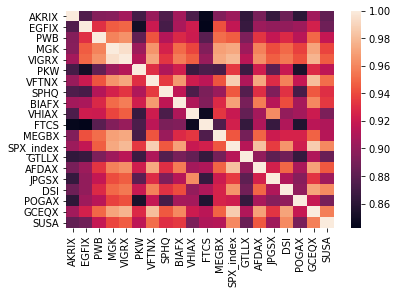

In [30]:
heat_map = sns.heatmap(correlation)

**Calculate sharpe ratios**

In [31]:
# Calculate Sharpe Ratio
sharpe_ratios = (top_funds_return.mean() * 252) / (top_funds_return.std() * np.sqrt(252))
sharpe_ratios_df = pd.DataFrame(sharpe_ratios)
sharpe_ratios_df.to_csv('Raw_Data/sharpe_ratios.csv')
sharpe_ratios_csvpath = Path("Raw_Data/sharpe_ratios.csv")
sharpe_ratio_1 = pd.read_csv(sharpe_ratios_csvpath, header=None)
columns = ["Ticker", "Sharpe Ratio"]
sharpe_ratio_1.columns = columns
sharpe_ratio_data = sharpe_ratio_1.drop([0])

**Plot sharpe ratios**

In [32]:
top_sharpe_ratio =  alt.Chart(sharpe_ratio_data).mark_bar().encode(
    x='Sharpe Ratio:Q',
    y= alt.Y('Ticker:N', sort='-x'),
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Ticker == 'SPX_index',  # If the ticker is SPX_index this test returns True,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
).properties(width=600)
top_sharpe_ratio

alt.Chart(...)

**Plot Relationship Between All The Funds Performance,Projected EPS Growth and P/E Ratio**

In [33]:
performance_plot = combined.hvplot.scatter(hover_cols=['Name'], x='Returns', y='Projected EPS Growth (%)', c='P/E Forward',clabel='P/E Forward', width=1000)
performance_plot

:Scatter   [Returns]   (Projected EPS Growth (%),P/E Forward,Name)

In [34]:
# Prepare some data
x = combined.nlargest(20, 'Returns')['Returns']
a = combined.nlargest(20, 'Returns')['Returns']*100
y = combined.nlargest(20, 'Returns')['P/E Forward']
z = combined.nlargest(20, 'Returns')['Projected EPS Growth (%)']
e = combined.nlargest(20, 'Total ESG Score')['Total ESG Score']

# output to static HTML file
output_file("ESG_ratios.html")

select_tools = ['pan','box_zoom','save','box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# create a new plot
p = figure(y_axis_type="auto", y_range=[10, 40], title="Returns and Multiple analysis",
   x_axis_label='Returns', y_axis_label='Multiple levels', tools=select_tools)


tooltips = [("index", "$index"), ('Returns', '@x{00.0%}'), ('P/E Forward', '@y')]

# Add the HoverTool to the figure
p.add_tools(HoverTool(tooltips=tooltips))

# Add renders
p.xaxis[0].formatter = NumeralTickFormatter(format='0.0%')
p.circle(x, a, legend_label="Return", fill_color="white", size=8)
p.circle(x, y, legend_label="P/E Forward", fill_color="green", size=6)
p.circle(x, z, legend_label="Projected EPS Growth (%)", fill_color="orange", size=6)
p.circle(x, e, legend_label="ESG Average", fill_color="blue", size=6)
# show the results
show(p)

## Top 20 funds by category

In [35]:
top_20_combined = combined_sorted.iloc[:20]
top_20_combined_fund = top_20_combined.groupby('Fund Category').mean()
top_20_combined_fund

,Returns,Dividend Yield TTM,Turnover Ratio,Morningstar Rating,E,S,G,Total ESG Score,P/E Forward,P/B,ROA,ROE,Projected EPS Growth (%),Yield (%)
Fund Category,,,,,,,,,,,,,,
Large Blend,0.114880,1.462857,39.857143,4.428571,3.790000,10.897143,7.925714,22.685714,17.892857,2.578571,9.031429,25.718571,8.644286,1.904286
Large Growth,0.124698,0.371667,44.333333,3.916667,2.744167,10.830000,7.856667,21.801667,19.187500,3.663333,9.841667,29.709167,10.814167,0.807500
Large Value,0.127931,1.940000,76.000000,4.000000,2.980000,11.440000,8.550000,23.930000,17.370000,2.550000,10.740000,28.660000,8.260000,1.970000


## Calculating Characterstics

In [36]:
character_df = combined.drop(columns=['Returns', 'Dividend Yield TTM', 'Turnover Ratio', 'E','S','G','Total ESG Score','P/E Forward','P/B','ROA','ROE','Projected EPS Growth (%)','Yield (%)','Market Cap($ mil)'])
character_df.head()

,Name,Morningstar Risk,Morningstar Rating,Fund Category
Ticker,,,,
MXXVX,Matthew 25,High,2.0,Large Blend
VLCGX,VALIC Company I Large Capital Growth,Below Average,3.0,Large Growth
MIGFX,MFS Massachusetts Inv Gr Stk A,Below Average,3.0,Large Growth
UMLGX,Columbia Select Large Cap Growth Inst,High,3.0,Large Growth
MGK,Vanguard Mega Cap Growth ETF,Average,4.0,Large Growth


In [37]:
character_df.sort_values("Fund Category")

,Name,Morningstar Risk,Morningstar Rating,Fund Category
Ticker,,,,
MXXVX,Matthew 25,High,2.0,Large Blend
PARNX,Parnassus Mid Cap Growth Investor,Above Average,2.0,Large Blend
SENCX,Touchstone Large Cap Focused A,Below Average,5.0,Large Blend
PRBLX,Parnassus Core Equity Investor,Low,5.0,Large Blend
VDIGX,Vanguard Dividend Growth Inv,Low,5.0,Large Blend
HSTAX,Hartford Stock HLS IA,Below Average,5.0,Large Blend
DSI,iShares MSCI KLD 400 Social ETF,Average,4.0,Large Blend
PIOTX,Pioneer Core Equity A,Average,3.0,Large Blend
TISCX,TIAA-CREF Social Choice Eq Instl,Average,3.0,Large Blend


## Find Categories of Funds

In [38]:
category_df = character_df.drop(columns=['Morningstar Rating']).sort_values("Fund Category")
category_df.head()

,Name,Morningstar Risk,Fund Category
Ticker,,,
MXXVX,Matthew 25,High,Large Blend
PARNX,Parnassus Mid Cap Growth Investor,Above Average,Large Blend
SENCX,Touchstone Large Cap Focused A,Below Average,Large Blend
PRBLX,Parnassus Core Equity Investor,Low,Large Blend
VDIGX,Vanguard Dividend Growth Inv,Low,Large Blend


In [39]:
category_df.rename(columns={'Fund Category':'Category', 'Morningstar Risk': 'Risk'}, inplace=True)
category_df.head(3)

,Name,Risk,Category
Ticker,,,
MXXVX,Matthew 25,High,Large Blend
PARNX,Parnassus Mid Cap Growth Investor,Above Average,Large Blend
SENCX,Touchstone Large Cap Focused A,Below Average,Large Blend


In [40]:
large_blend = category_df[category_df.Category == 'Large Blend']
large_value = category_df[category_df.Category == 'Large Value']
large_growth = category_df[category_df.Category == 'Large Growth']

## Find Average Risk for each Category

In [41]:
# Replacing the Risks with Integers and calculating average risk for each category type

large_blend.Risk[large_blend.Risk == 'Low'] = 0
large_blend.Risk[large_blend.Risk == 'Below Average'] = 1
large_blend.Risk[large_blend.Risk == 'Average'] = 2
large_blend.Risk[large_blend.Risk == 'Above Average'] = 3
large_blend.Risk[large_blend.Risk == 'High'] = 4

/Users/antondiezt/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/antondiezt/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [42]:
pie_blend = large_blend["Risk"].mean()

In [43]:
large_value.Risk[large_value.Risk == 'Low'] = 0
large_value.Risk[large_value.Risk == 'Below Average'] = 1
large_value.Risk[large_value.Risk == 'Average'] = 2
large_value.Risk[large_value.Risk == 'Above Average'] = 3
large_value.Risk[large_value.Risk == 'High'] = 4

In [44]:
pie_value = large_value["Risk"].mean()

In [45]:
large_growth.Risk[large_growth.Risk == 'Low'] = 0
large_growth.Risk[large_growth.Risk == 'Below Average'] = 1
large_growth.Risk[large_growth.Risk == 'Average'] = 2
large_growth.Risk[large_growth.Risk == 'Above Average'] = 3
large_growth.Risk[large_growth.Risk == 'High'] = 4

In [46]:
pie_growth = large_growth["Risk"].mean()

In [47]:
#Create Dataframe with Fund Categories and average risk for plotting

risk_category_df=pd.DataFrame({'Category':['Large Blend', 'Large Value','Large Growth'],'Average Risk':[pie_blend,pie_value,pie_growth]})

In [48]:
risk_graph = risk_category_df.set_index("Category")
risk_graph

,Average Risk
Category,
Large Blend,1.960784
Large Value,1.857143
Large Growth,1.780000


In [49]:
risk_plot = risk_graph.hvplot.bar(x='Category', y='Average Risk', label ="Average Risk per Fund Category", height=400, use_index=True)
risk_plot

:Bars   [Category]   (Average Risk)

# Find the % of each fund category with all funds

In [50]:
perc_cat_fund = category_df.drop(columns=['Risk','Name']).sort_values("Category")
perc_cat_fund.head()

,Category
Ticker,
MXXVX,Large Blend
TFFYX,Large Blend
REQEX,Large Blend
GESSX,Large Blend
AVEDX,Large Blend


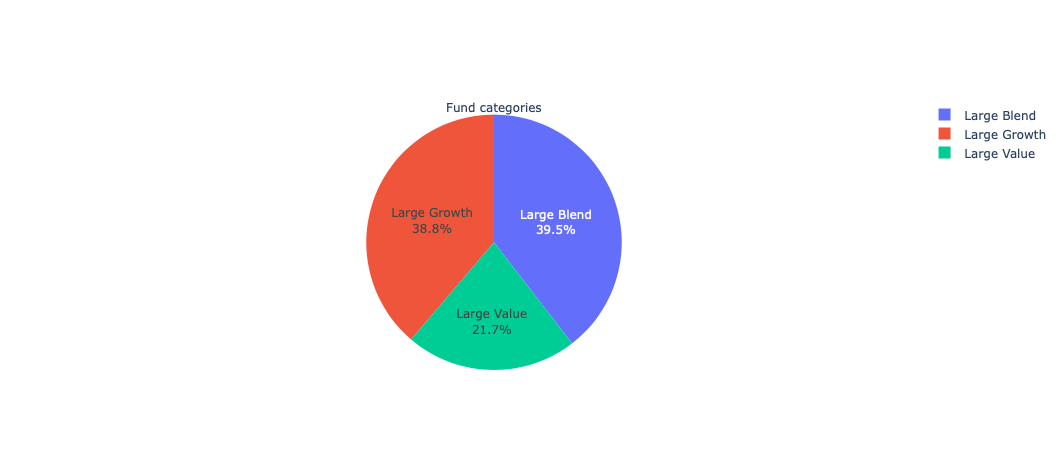

In [61]:
values = perc_cat_fund['Category'].value_counts()
labels = ['Large Blend', 'Large Growth', 'Large Value']

Fund_category_plot = go.Figure(data=[go.Pie(labels=labels, values=values, title= "Fund categories", textinfo='label+percent')])
Fund_category_plot.show()


## ESG Analysis

In [52]:
ESG = combined[['E','S','G','Total ESG Score']]
ESG_Top20 = ESG.join(top_funds_perf_df, how='inner')
ESG_Refined = ESG_Top20.sort_values(by='Returns', ascending=False)
ESG_Refined

,E,S,G,Total ESG Score,Returns
Ticker,,,,,
AKRIX,2.77,9.97,8.04,20.91,0.161800
EGFIX,2.71,10.16,7.92,20.80,0.143919
PWB,3.30,10.72,7.71,21.74,0.135775
MGK,2.71,11.41,8.23,22.58,0.132775
VIGRX,3.01,11.36,8.11,22.76,0.131370
PKW,2.98,11.44,8.55,23.93,0.127931
VFTNX,3.02,11.29,8.19,22.51,0.126411
SPHQ,3.83,11.28,8.42,23.54,0.125416
BIAFX,2.94,10.44,8.23,22.25,0.122550


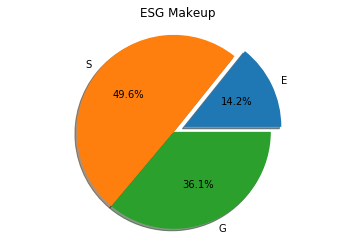

In [53]:
## Lower scores mean less risk
labels = 'E','S','G'
sizes = [ESG_Refined['E'].mean(), ESG_Refined['S'].mean(), ESG_Refined['G'].mean()]
explode = (0.12, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
ax1.set_title('ESG Makeup')
plt.show()

## Shows that companies are most proficient in the E category, Environmental

In [54]:
import hvplot.dask
SDplot = combined[['E','S','G']].copy()
columns = ['E', 'S', 'G']
ESG_plot = SDplot.hvplot.box(y=columns, group_label='ESG Score', legend=False, label = 'Variation in ESG categories',
                  value_label='Morningstar Rating', invert=True, width=500)
ESG_plot

:BoxWhisker   [ESG Score]   (Morningstar Rating)

# Final summary

In [60]:
# Create rows
row_performance = pn.Row(top_performer_table)
row_performance_analysis = pn.Row(top_20_ret_std_df_plot)
row_risk = pn.Row(risk_plot, Fund_category_plot)
row_ratios = pn.Row(p, top_sharpe_ratio)
row_ESG = pn.Row(ax1, ESG_plot)

# Create columns
column_intro = pn.Column("Summary", row_performance, pane_total, p)
column = pn.Column("Performance analysis",row_performance, row_performance_analysis)
column_metrics_risk = pn.Column("Funds metrics and categories", performance_plot, row_risk,row_ratios)
column_ESG = pn.Column ("ESG Analysis", row_ESG)

tabs = pn.Tabs(
    ("Introduction", column_intro),
    ("Investment Information", column),
    ("Fundamental analysis", column_metrics_risk),
    ("ESG Metrics", column_ESG)
    
)
tabs

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Vega(Chart)
        [2] Plotly(Figure, viewport={'xaxis.range': [-1.476709...})
        [3] Bokeh(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] Vega(Chart)
        [2] Row
            [0] HoloViews(Scatter)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Scatter)
        [2] Row
            [0] HoloViews(Bars)
            [1] Plotly(Figure)
        [3] Row
            [0] Bokeh(Figure)
            [1] Vega(Chart)
    [3] Column
        [0] Markdown(str)
        [1] Row
            [0] Str(AxesSubplot)
            [1] HoloViews(BoxWhisker)